In [613]:
import pandas as pd 
import seaborn as sns

In [617]:
df=pd.read_excel("C:/Users/ASUS/OneDrive - Niranjanlal Dalmia Educational Society/Fruad Detection project/cleaned_insurance_claims.xlsx")

In [619]:
df.head()

,months_as_customer,age,Age group,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,fraud_R_numeric,policy_csl_low,policy_csl_high
0,328,48,Senior,521585,2014-10-17,OH,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,1,250,500
1,228,42,Middle Age,342868,2006-06-27,IN,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,1,250,500
2,134,29,Adult,687698,2000-09-06,OH,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,2,100,300
3,256,41,Middle Age,227811,1990-05-25,IL,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,250,500
4,228,44,Middle Age,367455,2014-06-06,IL,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,2,500,1000


In [621]:
df.shape

(990, 42)

In [623]:
df.dtypes

months_as_customer                      int64
age                                     int64
Age group                              object
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [625]:
blanks =(df=="").sum()
blanks

months_as_customer             0
age                            0
Age group                      0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [627]:
null = df.isnull().sum()
null

months_as_customer              0
age                             0
Age group                       0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          90
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [629]:
df["authorities_contacted"]

0      Police
1      Police
2      Police
3      Police
4         NaN
        ...  
985      Fire
986      Fire
987    Police
988     Other
989    Police
Name: authorities_contacted, Length: 990, dtype: object

In [631]:
df["authorities_contacted"]=df["authorities_contacted"].fillna("Missing")

In [633]:
null2=df["authorities_contacted"].isnull().sum()
null2

0

In [635]:
duplicates= df.duplicated().sum()
duplicates

0

In [637]:

## adding new features 

In [639]:
# Convert date columns to datetime format if not already
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

# Calculate how many days passed between the policy start and the incident date
df['days_since_policy_bind'] = (df['incident_date'] - df['policy_bind_date']).dt.days

## This feature shows how long a customer has been with the company before an incident. Short tenures may correlate with fraud.


In [641]:
df['days_since_policy_bind']

0       100
1      3130
2      5282
3      8996
4       256
       ... 
985    8622
986     384
987    4358
988    1196
989    6681
Name: days_since_policy_bind, Length: 990, dtype: int64

In [643]:
# This creates a flag indicating whether the incident involved more than one vehicle
df['multi_vehicle_incident'] = (df['number_of_vehicles_involved'] > 1).astype(int)



# remove

In [645]:
df['multi_vehicle_incident']

0      0
1      0
2      1
3      0
4      0
      ..
985    0
986    0
987    1
988    0
989    0
Name: multi_vehicle_incident, Length: 990, dtype: int32

In [647]:
#remove


# This calculates the month difference between the policy binding date and the incident date
df['month_difference'] = (df['incident_date'].dt.year - df['policy_bind_date'].dt.year) * 12 + (df['incident_date'].dt.month - df['policy_bind_date'].dt.month)

In [278]:
df['month_difference']

0        3
1      103
2      173
3      296
4        8
      ... 
985    283
986     12
987    143
988     39
989    219
Name: month_difference, Length: 990, dtype: int32

In [649]:
# Extract the day of the week from the incident date
# Monday = 0, Sunday = 6
df['incident_dayofweek'] = df['incident_date'].dt.dayofweek


In [651]:
# Extract the month number (1–12) from the incident date
df['incident_month'] = df['incident_date'].dt.month


In [653]:
# Ensure we don't divide by zero — replace 0 total claims with NaN temporarily
df['total_claim_amount'] = df['total_claim_amount'].replace(0, pd.NA)

# Calculate percentage of each type of claim against total
df['claim_injury_pct'] = df['injury_claim'] / df['total_claim_amount']
df['claim_property_pct'] = df['property_claim'] / df['total_claim_amount']
df['claim_vehicle_pct'] = df['vehicle_claim'] / df['total_claim_amount']

## calculating percentages(pct)of features 


In [655]:
df['claim_injury_pct']

0      0.090909
1      0.153846
2      0.222222
3      0.100000
4      0.200000
         ...   
985    0.200000
986    0.166667
987    0.111111
988    0.111111
989    0.090909
Name: claim_injury_pct, Length: 990, dtype: float64

In [657]:
df['total_claim_amount']

0       71610
1        5070
2       34650
3       63400
4        6500
        ...  
985     87200
986    108480
987     67500
988     46980
989      5060
Name: total_claim_amount, Length: 990, dtype: int64

In [659]:
df['injury_claim']

0       6510
1        780
2       7700
3       6340
4       1300
       ...  
985    17440
986    18080
987     7500
988     5220
989      460
Name: injury_claim, Length: 990, dtype: int64

In [663]:
df[["multi_vehicle_incident","month_difference"]]

,multi_vehicle_incident,month_difference
0,0,3
1,0,103
2,1,173
3,0,296
4,0,8
...,...,...
985,0,283
986,0,12
987,1,143
988,0,39


In [665]:
df.shape

(990, 50)

In [667]:
df.columns

Index(['months_as_customer', 'age', 'Age group', 'policy_number',
       'policy_bind_date', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'fraud_R_numeric',
       'policy_csl_low', 'policy_csl_high', 'days_since_policy_bind',
       'multi_vehicle_incident', 'month_difference', 'incident_dayofweek',
       'incident

In [669]:
df.head()

,months_as_customer,age,Age group,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_csl_low,policy_csl_high,days_since_policy_bind,multi_vehicle_incident,month_difference,incident_dayofweek,incident_month,claim_injury_pct,claim_property_pct,claim_vehicle_pct
0,328,48,Senior,521585,2014-10-17,OH,1000,1406.91,0,466132,...,250,500,100,0,3,6,1,0.090909,0.181818,0.727273
1,228,42,Middle Age,342868,2006-06-27,IN,2000,1197.22,5000000,468176,...,250,500,3130,0,103,2,1,0.153846,0.153846,0.692308
2,134,29,Adult,687698,2000-09-06,OH,2000,1413.14,5000000,430632,...,100,300,5282,1,173,6,2,0.222222,0.111111,0.666667
3,256,41,Middle Age,227811,1990-05-25,IL,2000,1415.74,6000000,608117,...,250,500,8996,0,296,5,1,0.100000,0.100000,0.800000
4,228,44,Middle Age,367455,2014-06-06,IL,1000,1583.91,6000000,610706,...,500,1000,256,0,8,1,2,0.200000,0.100000,0.700000


In [671]:
numerical_cols = ['months_as_customer', 'age',
                  'policy_annual_premium', 'umbrella_limit', 'total_claim_amount', 
                  'injury_claim', 'property_claim', 'vehicle_claim',
                  'claim_injury_pct', 'claim_property_pct', 'claim_vehicle_pct','multi_vehicle_incident','month_difference']


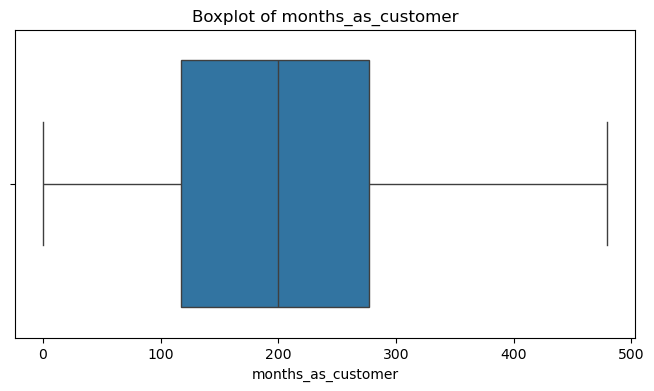

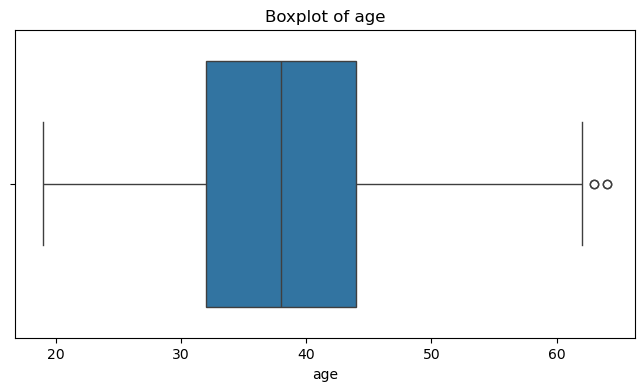

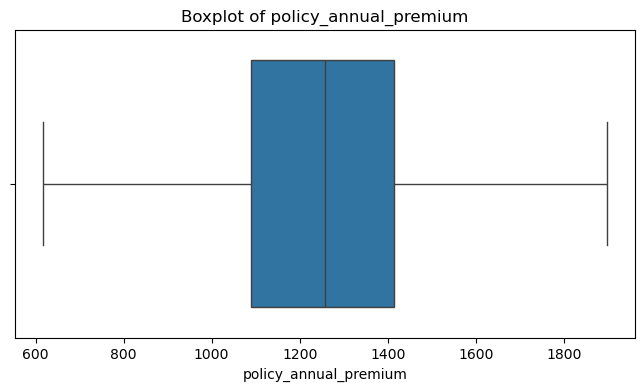

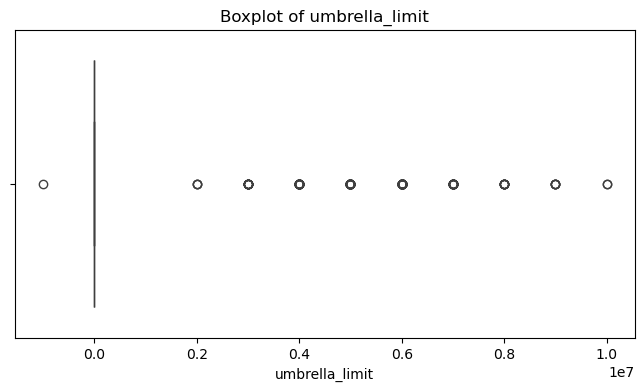

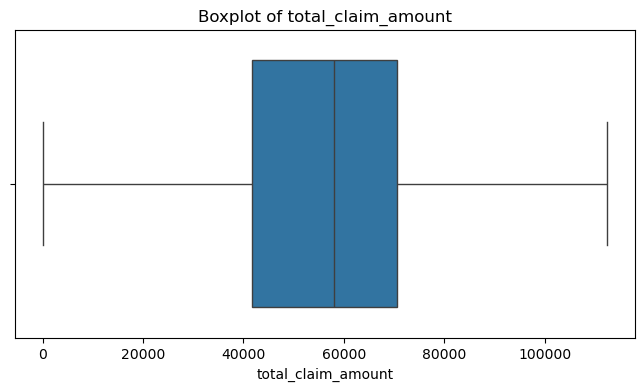

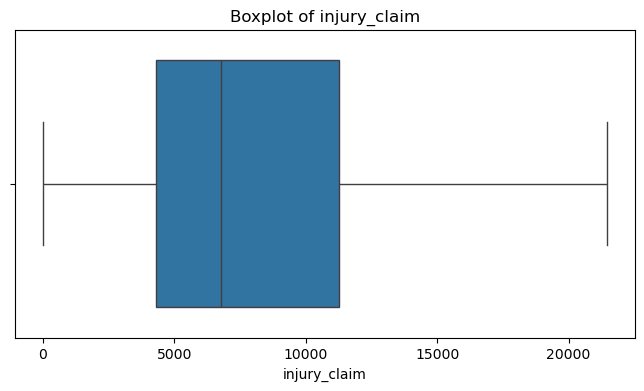

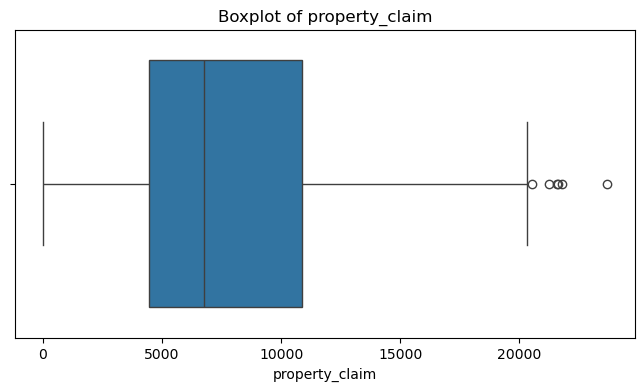

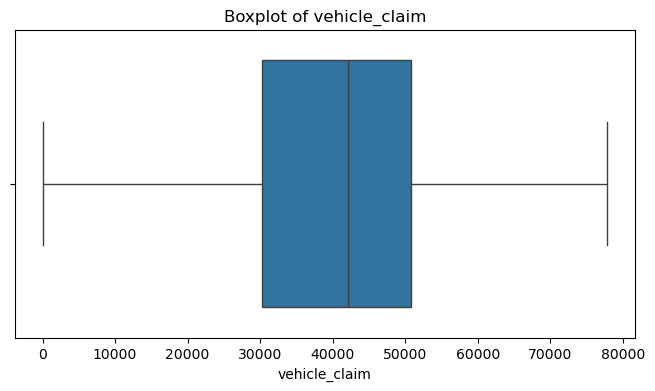

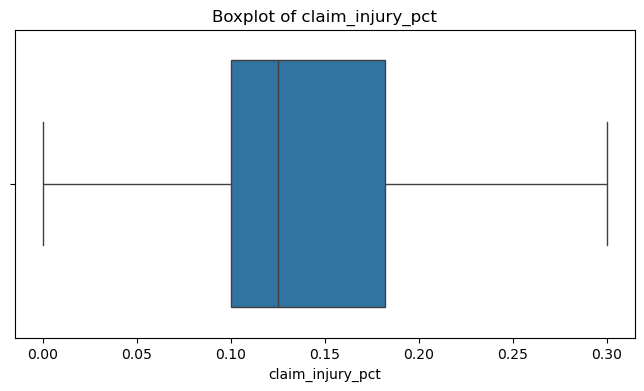

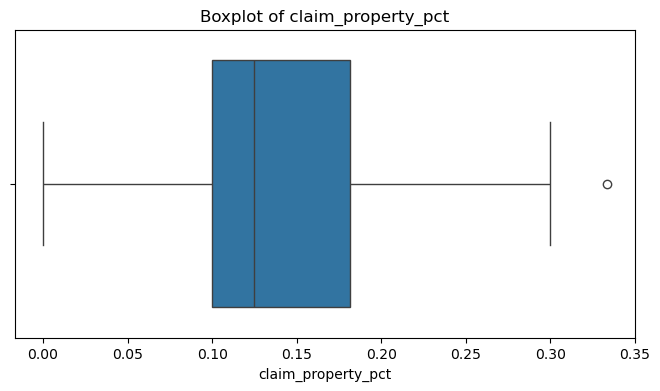

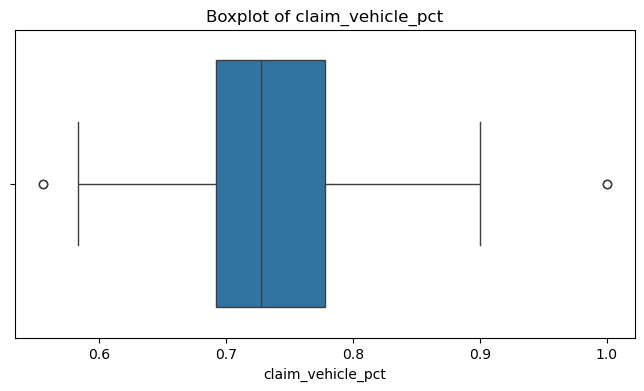

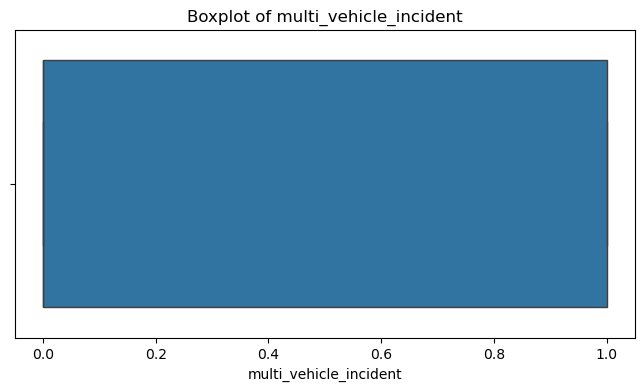

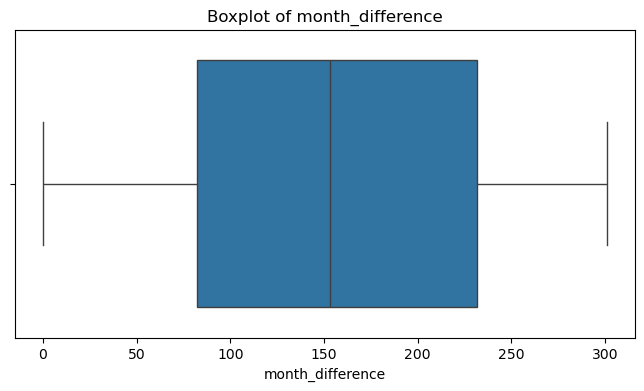

In [673]:

import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


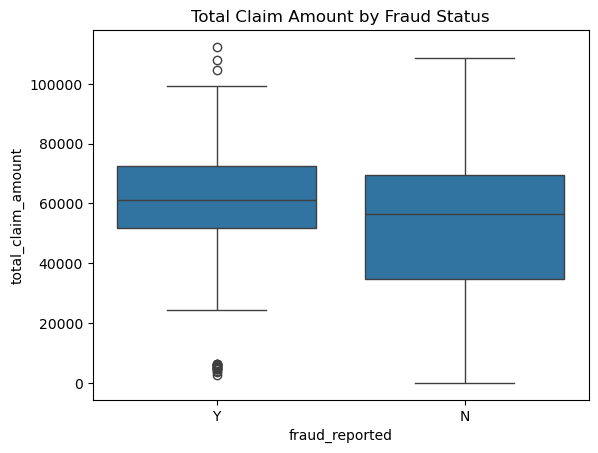

In [674]:
sns.boxplot(data=df, x='fraud_reported', y='total_claim_amount')
plt.title('Total Claim Amount by Fraud Status')
plt.show()


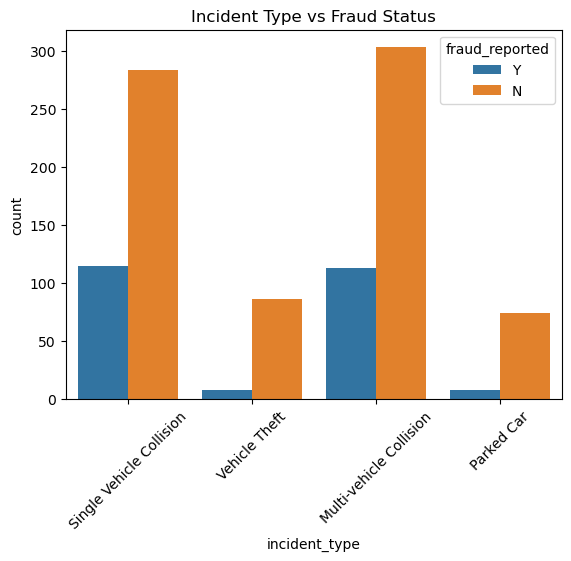

In [675]:
sns.countplot(data=df, x='incident_type', hue='fraud_reported')
plt.title('Incident Type vs Fraud Status')
plt.xticks(rotation=45)
plt.show()


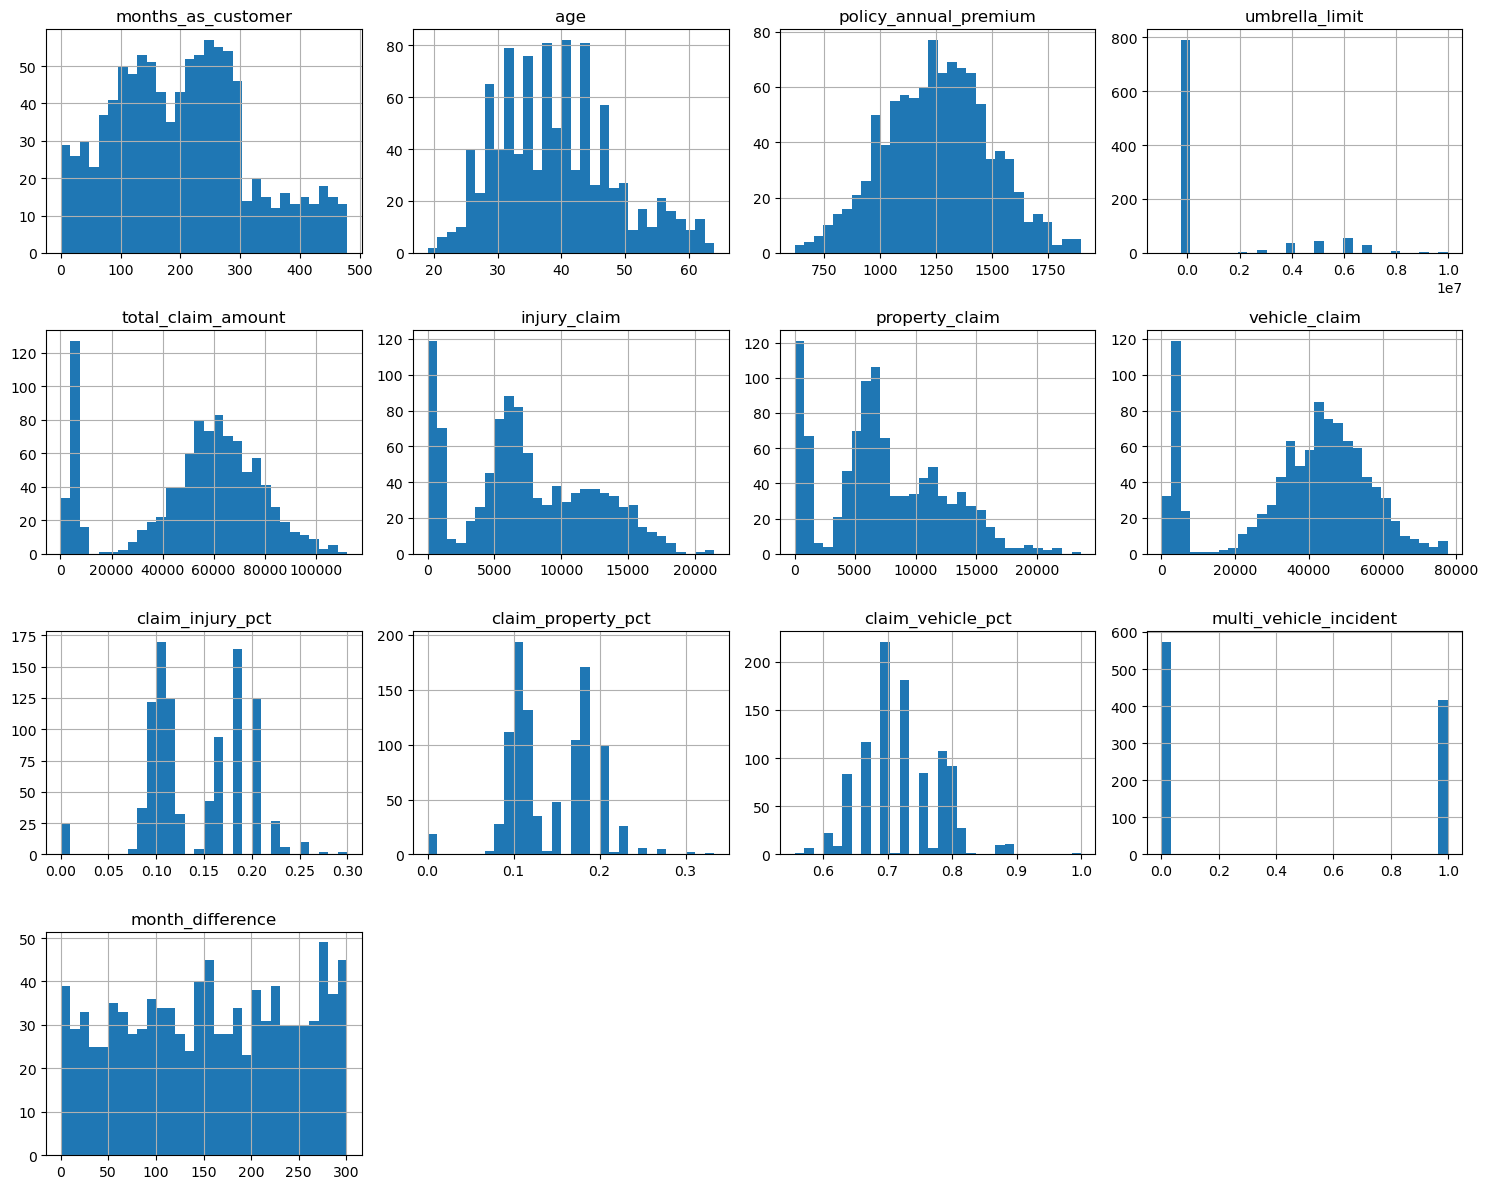

In [676]:
df[numerical_cols].hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()


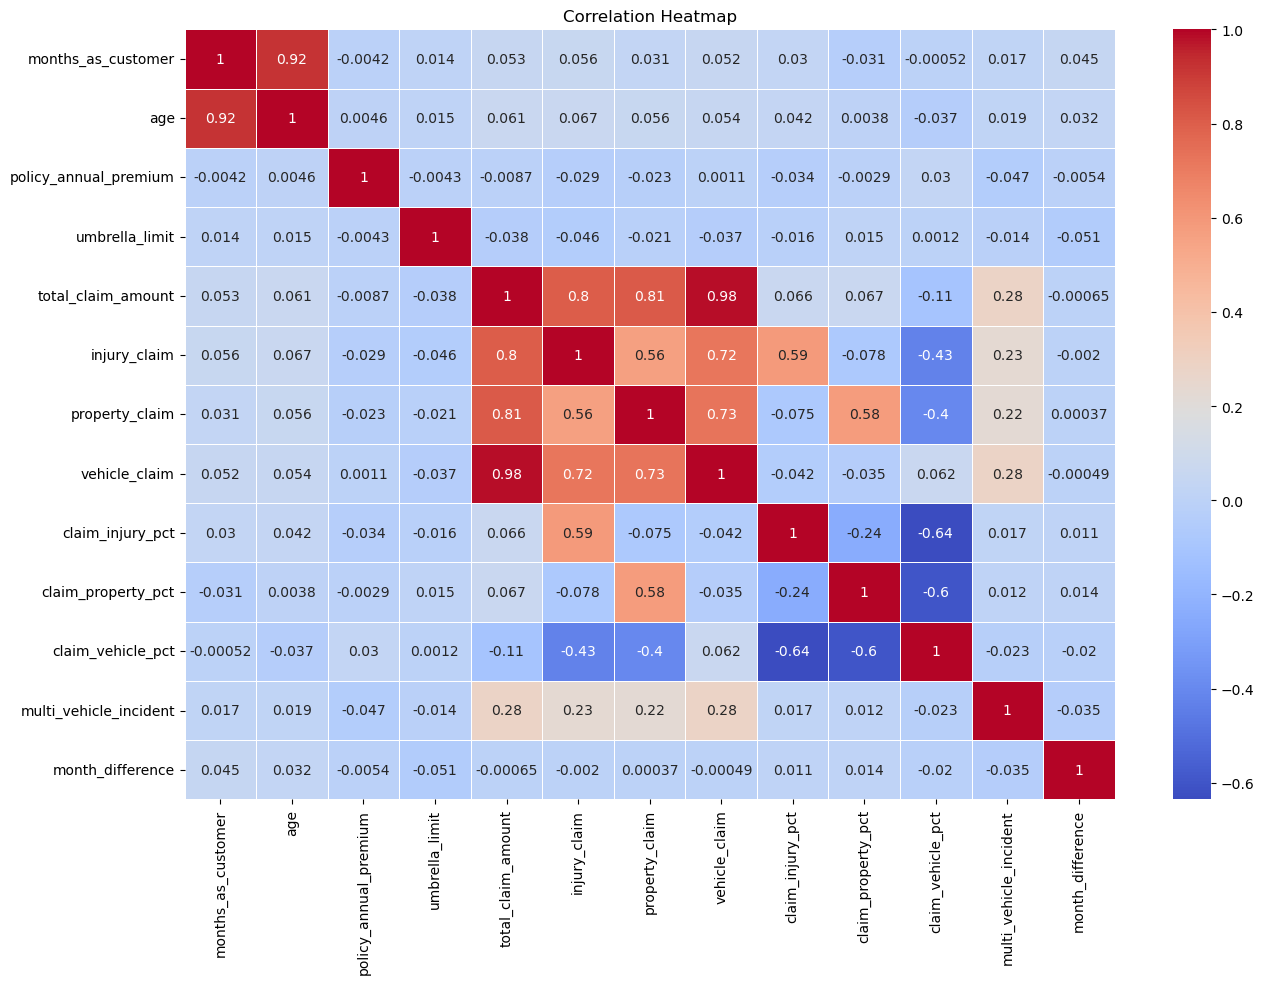

In [680]:
import numpy as np

plt.figure(figsize=(15, 10))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


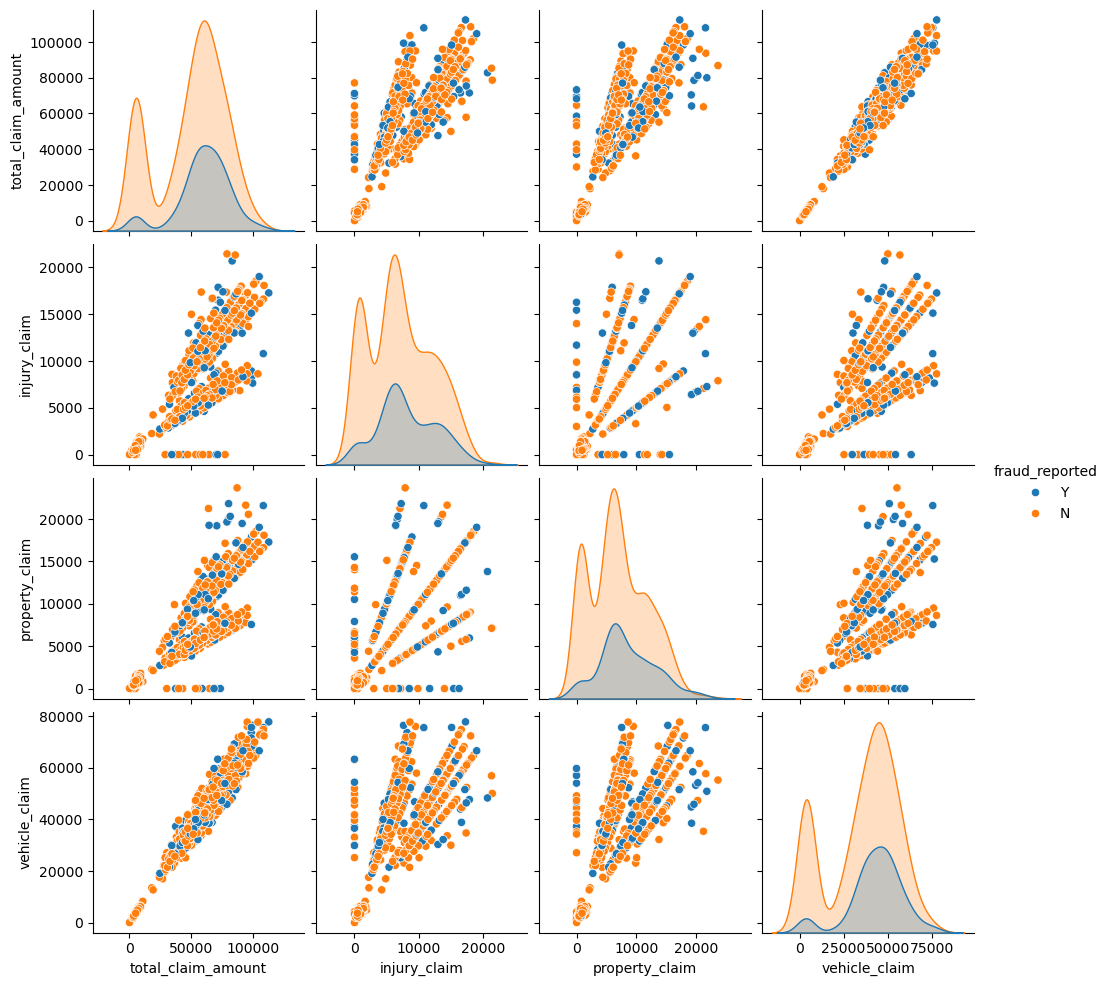

In [681]:
selected = ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported']
sns.pairplot(df[selected], hue='fraud_reported')
plt.show()


In [682]:
df['umbrella_limit'].dtype


dtype('int64')

In [683]:
df['umbrella_limit'].unique()


array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [685]:
df['umbrella_limit'] = df['umbrella_limit'].astype(str).str.replace('-', '', regex=False)


In [686]:
df['umbrella_limit'].unique()

array(['0', '5000000', '6000000', '4000000', '3000000', '8000000',
       '7000000', '9000000', '10000000', '1000000', '2000000'],
      dtype=object)

In [687]:
df['umbrella_limit'].dtype

dtype('O')

In [689]:
df['umbrella_limit'].value_counts()


umbrella_limit
0           790
6000000      57
5000000      45
4000000      38
7000000      29
3000000      12
8000000       8
9000000       5
2000000       3
10000000      2
1000000       1
Name: count, dtype: int64

## "Upon cleaning the umbrella_limit field, all minus signs were removed. Remaining zeros were evaluated — based on domain understanding, these likely indicate no extra coverage. Retained as-is for further analysis."

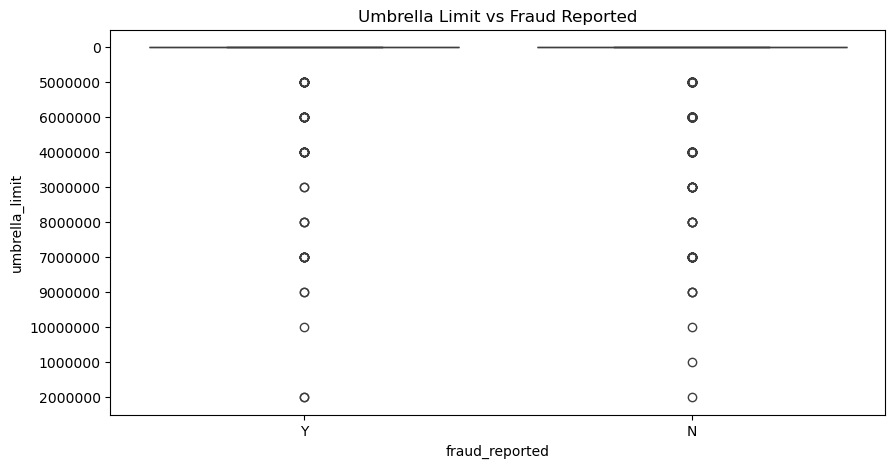

In [691]:
## Whether fraudsters tend to choose higher/lower umbrella limits
## If 0 is more common in fraud or not-fraud cases


plt.figure(figsize=(10, 5))
sns.boxplot(x='fraud_reported', y='umbrella_limit', data=df)
plt.title('Umbrella Limit vs Fraud Reported')
plt.show()


In [693]:
df

,months_as_customer,age,Age group,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_csl_low,policy_csl_high,days_since_policy_bind,multi_vehicle_incident,month_difference,incident_dayofweek,incident_month,claim_injury_pct,claim_property_pct,claim_vehicle_pct
0,328,48,Senior,521585,2014-10-17,OH,1000,1406.91,0,466132,...,250,500,100,0,3,6,1,0.090909,0.181818,0.727273
1,228,42,Middle Age,342868,2006-06-27,IN,2000,1197.22,5000000,468176,...,250,500,3130,0,103,2,1,0.153846,0.153846,0.692308
2,134,29,Adult,687698,2000-09-06,OH,2000,1413.14,5000000,430632,...,100,300,5282,1,173,6,2,0.222222,0.111111,0.666667
3,256,41,Middle Age,227811,1990-05-25,IL,2000,1415.74,6000000,608117,...,250,500,8996,0,296,5,1,0.100000,0.100000,0.800000
4,228,44,Middle Age,367455,2014-06-06,IL,1000,1583.91,6000000,610706,...,500,1000,256,0,8,1,2,0.200000,0.100000,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,3,38,Middle Age,941851,1991-07-16,OH,1000,1310.80,0,431289,...,500,1000,8622,0,283,6,2,0.200000,0.100000,0.700000
986,285,41,Middle Age,186934,2014-01-05,IL,1000,1436.79,0,608177,...,100,300,384,0,12,5,1,0.166667,0.166667,0.666667
987,130,34,Adult,918516,2003-02-17,OH,500,1383.49,3000000,442797,...,250,500,4358,1,143,4,1,0.111111,0.111111,0.777778
988,458,62,old,533940,2011-11-18,IL,2000,1356.92,5000000,441714,...,500,1000,1196,0,39,3,2,0.111111,0.111111,0.777778


In [694]:
df.columns 

Index(['months_as_customer', 'age', 'Age group', 'policy_number',
       'policy_bind_date', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'fraud_R_numeric',
       'policy_csl_low', 'policy_csl_high', 'days_since_policy_bind',
       'multi_vehicle_incident', 'month_difference', 'incident_dayofweek',
       'incident

In [695]:
df.dtypes

months_as_customer                      int64
age                                     int64
Age group                              object
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                         object
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [701]:
print(df['fraud_reported'].value_counts())

fraud_reported
N    746
Y    244
Name: count, dtype: int64


In [708]:
# Correcting the fraud_R_numeric column
# Replace '1' (Yes) with '1' (fraud) and '2' (No) with '0' (non-fraud)
df['fraud_R_numeric'] = df['fraud_R_numeric'].replace({1: 1, 2: 0})

# Double-check the column's updated values
print(df['fraud_R_numeric'].value_counts())


fraud_R_numeric
0    746
1    244
Name: count, dtype: int64


In [711]:
df.head()

,months_as_customer,age,Age group,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_csl_low,policy_csl_high,days_since_policy_bind,multi_vehicle_incident,month_difference,incident_dayofweek,incident_month,claim_injury_pct,claim_property_pct,claim_vehicle_pct
0,328,48,Senior,521585,2014-10-17,OH,1000,1406.91,0,466132,...,250,500,100,0,3,6,1,0.090909,0.181818,0.727273
1,228,42,Middle Age,342868,2006-06-27,IN,2000,1197.22,5000000,468176,...,250,500,3130,0,103,2,1,0.153846,0.153846,0.692308
2,134,29,Adult,687698,2000-09-06,OH,2000,1413.14,5000000,430632,...,100,300,5282,1,173,6,2,0.222222,0.111111,0.666667
3,256,41,Middle Age,227811,1990-05-25,IL,2000,1415.74,6000000,608117,...,250,500,8996,0,296,5,1,0.100000,0.100000,0.800000
4,228,44,Middle Age,367455,2014-06-06,IL,1000,1583.91,6000000,610706,...,500,1000,256,0,8,1,2,0.200000,0.100000,0.700000


In [713]:
df[["fraud_reported", "fraud_R_numeric"]]


,fraud_reported,fraud_R_numeric
0,Y,1
1,Y,1
2,N,0
3,Y,1
4,N,0
...,...,...
985,N,0
986,N,0
987,N,0
988,N,0


In [715]:
df["Age group"].head()

0        Senior
1    Middle Age
2         Adult
3    Middle Age
4    Middle Age
Name: Age group, dtype: object

In [717]:
#Step 1: Make a copy of the cleaned dataframe to preserve the original
df_model = df.copy()

In [719]:
df_model.head()

,months_as_customer,age,Age group,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_csl_low,policy_csl_high,days_since_policy_bind,multi_vehicle_incident,month_difference,incident_dayofweek,incident_month,claim_injury_pct,claim_property_pct,claim_vehicle_pct
0,328,48,Senior,521585,2014-10-17,OH,1000,1406.91,0,466132,...,250,500,100,0,3,6,1,0.090909,0.181818,0.727273
1,228,42,Middle Age,342868,2006-06-27,IN,2000,1197.22,5000000,468176,...,250,500,3130,0,103,2,1,0.153846,0.153846,0.692308
2,134,29,Adult,687698,2000-09-06,OH,2000,1413.14,5000000,430632,...,100,300,5282,1,173,6,2,0.222222,0.111111,0.666667
3,256,41,Middle Age,227811,1990-05-25,IL,2000,1415.74,6000000,608117,...,250,500,8996,0,296,5,1,0.100000,0.100000,0.800000
4,228,44,Middle Age,367455,2014-06-06,IL,1000,1583.91,6000000,610706,...,500,1000,256,0,8,1,2,0.200000,0.100000,0.700000


In [721]:
# 🎯 Step 2: Define your target variable (fraud_R_numeric) and feature matrix
y = df_model['fraud_R_numeric']  # This is what we want to predict
X = df_model.drop(columns=['fraud_reported', 'fraud_R_numeric'])  # Drop target and its text version


In [723]:
X.head()

,months_as_customer,age,Age group,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,policy_csl_low,policy_csl_high,days_since_policy_bind,multi_vehicle_incident,month_difference,incident_dayofweek,incident_month,claim_injury_pct,claim_property_pct,claim_vehicle_pct
0,328,48,Senior,521585,2014-10-17,OH,1000,1406.91,0,466132,...,250,500,100,0,3,6,1,0.090909,0.181818,0.727273
1,228,42,Middle Age,342868,2006-06-27,IN,2000,1197.22,5000000,468176,...,250,500,3130,0,103,2,1,0.153846,0.153846,0.692308
2,134,29,Adult,687698,2000-09-06,OH,2000,1413.14,5000000,430632,...,100,300,5282,1,173,6,2,0.222222,0.111111,0.666667
3,256,41,Middle Age,227811,1990-05-25,IL,2000,1415.74,6000000,608117,...,250,500,8996,0,296,5,1,0.100000,0.100000,0.800000
4,228,44,Middle Age,367455,2014-06-06,IL,1000,1583.91,6000000,610706,...,500,1000,256,0,8,1,2,0.200000,0.100000,0.700000


In [725]:
# Step 3: Drop irrelevant or problematic columns from X
drop_cols = [
    'policy_number',           # Unique identifier, no predictive power
    'insured_zip',             # High cardinality, might cause overfitting
    'incident_date',           # Raw date column, not directly usable
    'policy_bind_date',        # Raw date column, use derived feature instead
    'incident_location'        # Likely unique per record, not helpful for prediction
]
X.drop(columns=drop_cols, inplace=True)


In [727]:
X.head()

,months_as_customer,age,Age group,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,policy_csl_low,policy_csl_high,days_since_policy_bind,multi_vehicle_incident,month_difference,incident_dayofweek,incident_month,claim_injury_pct,claim_property_pct,claim_vehicle_pct
0,328,48,Senior,OH,1000,1406.91,0,MALE,MD,craft-repair,...,250,500,100,0,3,6,1,0.090909,0.181818,0.727273
1,228,42,Middle Age,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,250,500,3130,0,103,2,1,0.153846,0.153846,0.692308
2,134,29,Adult,OH,2000,1413.14,5000000,FEMALE,PhD,sales,...,100,300,5282,1,173,6,2,0.222222,0.111111,0.666667
3,256,41,Middle Age,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,250,500,8996,0,296,5,1,0.100000,0.100000,0.800000
4,228,44,Middle Age,IL,1000,1583.91,6000000,MALE,Associate,sales,...,500,1000,256,0,8,1,2,0.200000,0.100000,0.700000


In [733]:
# Convert 'umbrella_limit' to numeric, if needed
X['umbrella_limit'] = X['umbrella_limit'].astype(int)

In [735]:
# Step 5: Identify categorical columns to encode
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [737]:
# Step 6: One-Hot Encode categorical features using pd.get_dummies
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [739]:
# Check shapes
print("Feature Matrix Shape (X):", X_encoded.shape)
print("Target Variable Shape (y):", y.shape)

Feature Matrix Shape (X): (990, 156)
Target Variable Shape (y): (990,)


In [741]:
X_encoded.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,False,False,False,False,False,False,False,False,False,False
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,False,False,False,False,False,False,False,False,False,False
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,False,True,False,False,False,False,False,False,False,False
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,False,False,False,False,False,True,False,False,False,False
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,False,False,True,False,False,False,False,False,False,False


In [744]:
from sklearn.model_selection import train_test_split

# Splitting into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Shape Check
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

#stratify=y ensures the class distribution (fraud vs. non-fraud) is maintained in both train and test sets.



Training Set Shape: (792, 156)
Testing Set Shape: (198, 156)


## stratify=y is very important when:

You have classification tasks

The target variable is imbalanced (like fraud detection)

You want a fair and consistent train-test distribution ##

In [747]:
X_train.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
912,55,35,500,1198.44,8000000,0,0,9,1,0,...,False,False,False,False,False,False,True,False,False,False
266,271,40,1000,1251.65,0,71200,0,6,1,0,...,False,False,False,False,False,False,False,False,False,False
884,45,31,500,1459.50,0,0,0,6,1,1,...,False,False,False,False,False,False,False,False,False,False
708,96,29,1000,1274.70,5000000,47500,-58700,15,3,2,...,False,False,False,True,False,False,False,False,False,False
331,176,39,500,1365.46,4000000,0,-56600,14,3,2,...,False,False,False,True,False,False,False,False,False,False


In [749]:
X_train.dtypes

months_as_customer         int64
age                        int64
policy_deductable          int64
policy_annual_premium    float64
umbrella_limit             int32
                          ...   
auto_model_Tahoe            bool
auto_model_Ultima           bool
auto_model_Wrangler         bool
auto_model_X5               bool
auto_model_X6               bool
Length: 156, dtype: object

In [751]:
# Convert all boolean columns to int
X_train = X_train.astype({col: int for col in X_train.select_dtypes(include='bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes(include='bool').columns})

In [753]:
X_train.dtypes

months_as_customer         int64
age                        int64
policy_deductable          int64
policy_annual_premium    float64
umbrella_limit             int32
                          ...   
auto_model_Tahoe           int32
auto_model_Ultima          int32
auto_model_Wrangler        int32
auto_model_X5              int32
auto_model_X6              int32
Length: 156, dtype: object

In [755]:
## we will always do smote analysis on train data because we cannot test our model on synthetic data 

In [757]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Shape Check after balancing
print("Balanced Training Set Shape:", X_train_balanced.shape)
print("Balanced Fraud Count:", y_train_balanced.value_counts())


Balanced Training Set Shape: (1194, 156)
Balanced Fraud Count: fraud_R_numeric
0    597
1    597
Name: count, dtype: int64


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


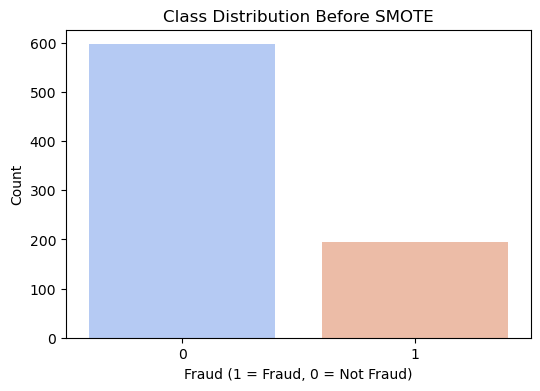

In [759]:
import matplotlib.pyplot as plt

# BEFORE SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, hue=y_train, palette='coolwarm', legend=False)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Fraud (1 = Fraud, 0 = Not Fraud)')
plt.ylabel('Count')
plt.show()


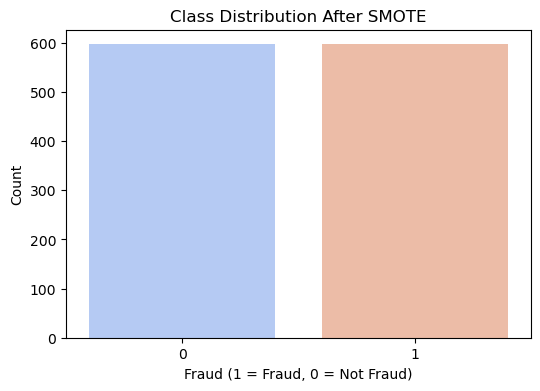

In [761]:
# AFTER SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_balanced, hue=y_train_balanced, palette='coolwarm', legend=False)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Fraud (1 = Fraud, 0 = Not Fraud)')
plt.ylabel('Count')
plt.show()

In [762]:

# X_train, X_test, y_train, y_test
# After SMOTE we have: X_train_balanced, y_train_balanced


In [765]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)



In [767]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit model on SMOTE-balanced training data
log_model.fit(X_train_scaled, y_train_balanced)

# Predict on original test set (not SMOTE-applied)
y_pred = log_model.predict(X_test_scaled)


In [769]:
# Evaluation Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.4f}")


Confusion Matrix:
[[133  16]
 [ 25  24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       149
           1       0.60      0.49      0.54        49

    accuracy                           0.79       198
   macro avg       0.72      0.69      0.70       198
weighted avg       0.78      0.79      0.79       198


Accuracy Score: 0.7929


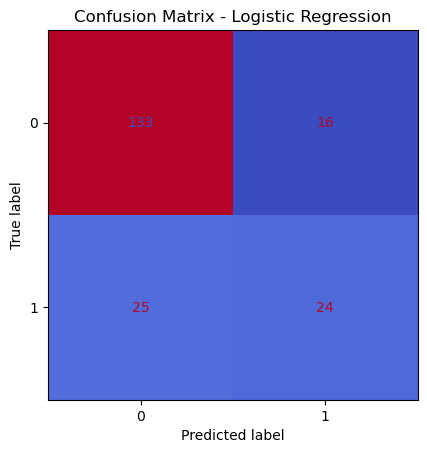

In [771]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="coolwarm", colorbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.grid(False)
plt.show()


## Random Forest

In [774]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [776]:
# Instantiate the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(random_state=42)

In [778]:
# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[135  14]
 [ 41   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       149
           1       0.36      0.16      0.23        49

    accuracy                           0.72       198
   macro avg       0.57      0.53      0.53       198
weighted avg       0.67      0.72      0.68       198

Accuracy Score: 0.7222222222222222


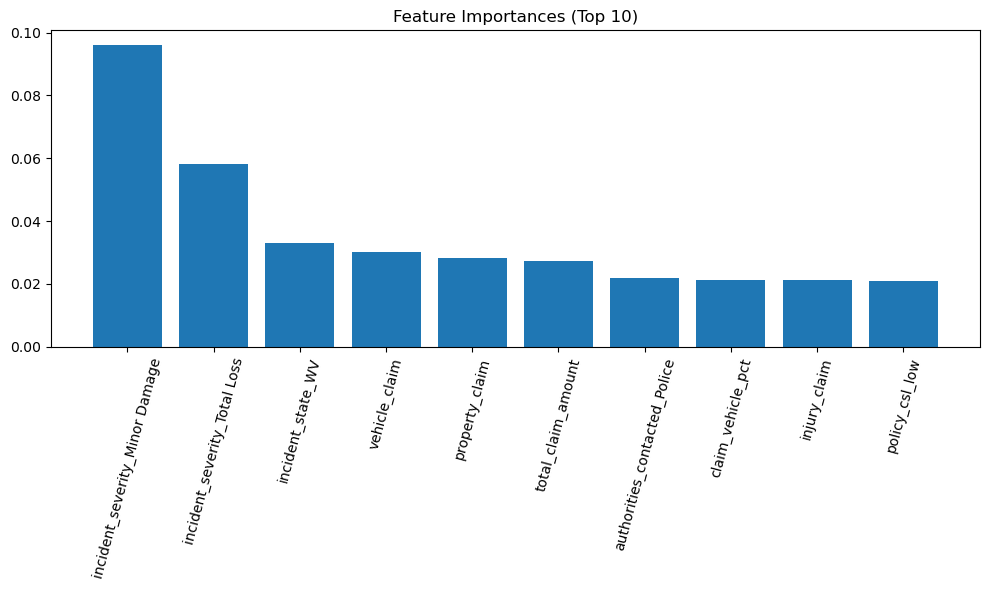

In [780]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the best model
importances = best_rf_model.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Top 10)")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [X_train.columns[i] for i in indices[:10]], rotation=75)
plt.tight_layout()
plt.show()


In [782]:
from sklearn.model_selection import GridSearchCV

# Parameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf_model.predict(X_test)
print("Accuracy of Best Model:", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy of Best Model: 0.7323232323232324


In [783]:
import pandas as pd

# Use the trained model from GridSearchCV
feature_imp = pd.Series(best_rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display top 10 features
feature_imp.head(10)



incident_severity_Minor Damage    0.110024
incident_severity_Total Loss      0.051583
incident_state_WV                 0.033712
injury_claim                      0.028344
vehicle_claim                     0.027729
property_claim                    0.024818
incident_state_NY                 0.022225
total_claim_amount                0.021837
month_difference                  0.021097
policy_csl_high                   0.020472
dtype: float64

## XG boost 

In [785]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit model
xgb_model.fit(X_train_balanced, y_train_balanced)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test , y_pred_xgb))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_xgb))


C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:50:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[125  24]
 [ 23  26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       149
           1       0.52      0.53      0.53        49

    accuracy                           0.76       198
   macro avg       0.68      0.68      0.68       198
weighted avg       0.76      0.76      0.76       198


Accuracy Score: 0.7626262626262627


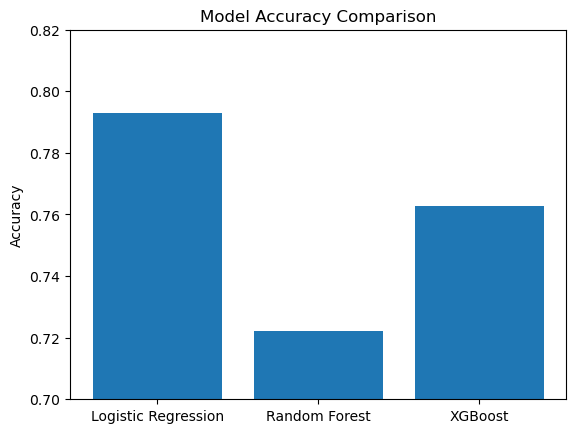

In [819]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [0.7929, 0.7222, 0.7626]
plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.82)
plt.show()

In [789]:
X_train_balanced, y_train_balanced  # after SMOTE
X_test, y_test  # real test set


(     months_as_customer  age  policy_deductable  policy_annual_premium  \
 95                   29   25               2000                1352.83   
 350                 256   43                500                1203.17   
 300                 175   34                500                 915.29   
 273                 108   33               2000                 694.45   
 640                 169   36                500                1616.26   
 ..                  ...  ...                ...                    ...   
 652                 303   43               1000                 671.01   
 668                  25   38               1000                1540.91   
 344                 230   39               1000                 904.70   
 351                 229   37               2000                1212.12   
 674                 222   38               2000                1157.97   
 
      umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
 95                

In [790]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
xgb = XGBClassifier()

lr.fit(X_train_scaled, y_train_balanced)
rf.fit(X_train_balanced, y_train_balanced)
xgb.fit(X_train_balanced, y_train_balanced)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [791]:
lr_pred = lr.predict_proba(X_test_scaled)[:, 1]
rf_pred = rf.predict_proba(X_test)[:, 1]
xgb_pred = xgb.predict_proba(X_test)[:, 1]


In [792]:
import numpy as np
meta_X_test = np.column_stack((lr_pred, rf_pred, xgb_pred))


In [793]:
lr_train_pred = lr.predict_proba(X_train_scaled)[:, 1]
rf_train_pred = rf.predict_proba(X_train_balanced)[:, 1]
xgb_train_pred = xgb.predict_proba(X_train_balanced)[:, 1]

meta_X_train = np.column_stack((lr_train_pred, rf_train_pred, xgb_train_pred))


In [794]:
meta_model = LogisticRegression()
meta_model.fit(meta_X_train, y_train_balanced)


LogisticRegression()

In [795]:
meta_pred = meta_model.predict(meta_X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, meta_pred))
print("\nClassification Report:\n", classification_report(y_test, meta_pred))
print("\nAccuracy Score:", accuracy_score(y_test, meta_pred))


Confusion Matrix:
 [[129  20]
 [ 24  25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       149
           1       0.56      0.51      0.53        49

    accuracy                           0.78       198
   macro avg       0.70      0.69      0.69       198
weighted avg       0.77      0.78      0.77       198


Accuracy Score: 0.7777777777777778


In [796]:
meta_prob = meta_model.predict_proba(meta_X_test)[:, 1]


In [797]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

for thresh in thresholds:
    meta_pred_thresh = (meta_prob > thresh).astype(int)
    precision = precision_score(y_test, meta_pred_thresh)
    recall = recall_score(y_test, meta_pred_thresh)
    f1 = f1_score(y_test, meta_pred_thresh)
    print(f"Threshold: {thresh:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1: {f1:.2f}")


Threshold: 0.20 | Precision: 0.57 | Recall: 0.71 | F1: 0.64
Threshold: 0.30 | Precision: 0.55 | Recall: 0.59 | F1: 0.57
Threshold: 0.35 | Precision: 0.57 | Recall: 0.59 | F1: 0.58
Threshold: 0.40 | Precision: 0.56 | Recall: 0.55 | F1: 0.56
Threshold: 0.45 | Precision: 0.55 | Recall: 0.53 | F1: 0.54
Threshold: 0.50 | Precision: 0.56 | Recall: 0.51 | F1: 0.53
Threshold: 0.55 | Precision: 0.55 | Recall: 0.47 | F1: 0.51
Threshold: 0.60 | Precision: 0.54 | Recall: 0.41 | F1: 0.47


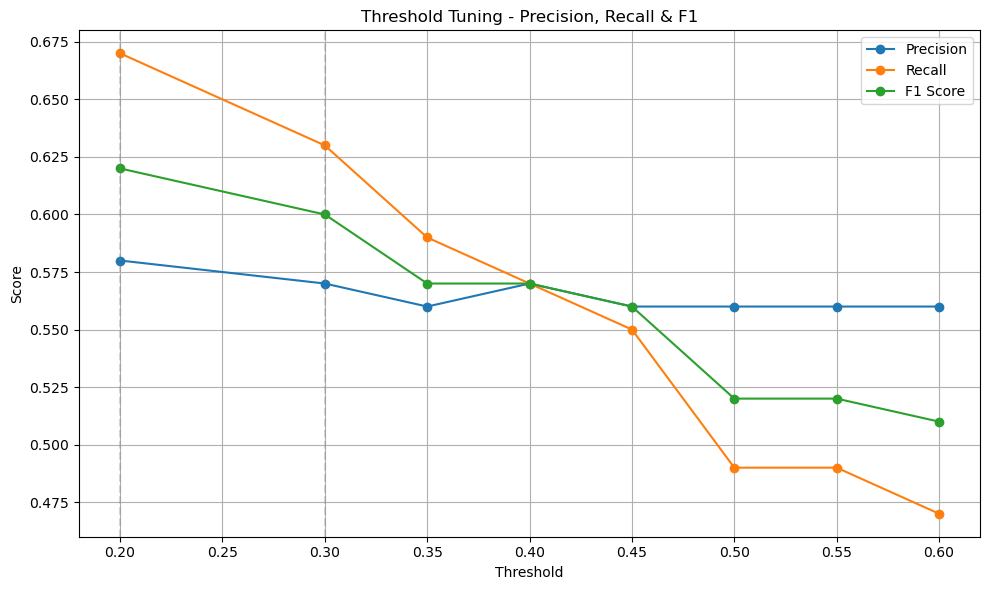

In [811]:
import matplotlib.pyplot as plt

# Thresholds and corresponding metrics
thresholds = [0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
precision = [0.58, 0.57, 0.56, 0.57, 0.56, 0.56, 0.56, 0.56]
recall =    [0.67, 0.63, 0.59, 0.57, 0.55, 0.49, 0.49, 0.47]
f1 =        [0.62, 0.60, 0.57, 0.57, 0.56, 0.52, 0.52, 0.51]

# Plot
plt.figure(figsize=(10,6))
plt.plot(thresholds, precision, label='Precision', marker='o')
plt.plot(thresholds, recall, label='Recall', marker='o')
plt.plot(thresholds, f1, label='F1 Score', marker='o')
plt.axvline(x=0.2, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=0.3, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning - Precision, Recall & F1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [813]:
# Apply threshold = 0.2
meta_pred_thresh_02 = (meta_prob > 0.2).astype(int)


In [815]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, meta_pred_thresh_02)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, meta_pred_thresh_02)
print("\nClassification Report:\n", class_report)

# Accuracy Score
accuracy = accuracy_score(y_test, meta_pred_thresh_02)
print("\nAccuracy Score:", accuracy)


Confusion Matrix:
 [[123  26]
 [ 14  35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       149
           1       0.57      0.71      0.64        49

    accuracy                           0.80       198
   macro avg       0.74      0.77      0.75       198
weighted avg       0.82      0.80      0.80       198


Accuracy Score: 0.797979797979798
